
<div style="padding:20px;
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            font-weight:500">Titanic Passengers Analysis</div>
<center>
<img src="https://miro.medium.com/v2/resize:fit:990/0*mW_viyMFh1RCJ3Kj.jpg" width=600>
</center>
            

# Table of Contents
- [0. Introduction](#Introduction)
- [1. Problem Understanding](#Problem)
- [2. Importing the libraries](#libraries)
- [3. Data Exploration](#Exploration)
- [4. Data Preprocessing](#Preprocessing)
- [5. EDA](#EDA)
- [6. Label Encoding](#Encoding)
- [7. Feature Engineering](#Engineering)
- [8. Choosing Target](#Target)



<a id="Introduction"></a>[↑](#top)

# <div style="background-color: #D9C4EC; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>0. Introduction</b></div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FFC300;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            The Titanic dataset is a popular beginner-friendly dataset used to learn machine learning. It contains information about passengers on the Titanic, including whether they survived or not. Key features include age, gender, passenger class (1st, 2nd, 3rd), fare, and whether they had family onboard. Today we will have a walkthrough of this dataset.
        </p>
    </div>

<a id="Problem"></a>[↑](#top)

# <div style="background-color: #D9C4EC; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>1. Problem Understanding</b></div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FFC300;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            The goal is to understand which factors contributed most to survival and prepare data for machine learning modeling.
        </p>
    </div>

<a id="libraries"></a>[↑](#top)

<div style="padding:20px;
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            font-weight:500"2. Importing the libraries </div>


In [15]:
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


<a id="Exploration"></a>[↑](#top)

# <div style="background-color: #D9C4EC; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  3.  Data Exploration </b></div>


In [16]:
data = pd.read_csv("train (2).csv")



In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# preview the data
print("Titanic dataset overview")
print('\n')
print(data.head())
print('\n')


Titanic dataset overview


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450  

In [19]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
data.shape


(891, 12)

In [21]:
data.info()
print('#'*80)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
################################################################################


In [22]:
# describe the data
print('\n')
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
print(data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<a id="Preprocessing"></a>[↑](#top)

# <div style="background-color: #D9C4EC; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  4. Data Preprocessing </b></div>


In [24]:
df= data.copy()


## Checking Null values

In [25]:
print(df.isnull() .sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
## Checking null values in %
df.isnull().sum() / df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [27]:
#Lets check which rows have null Embarked column
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
import missingno as msno
# Visualize the missing data with a matrix plot
# Set a colorful background and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Set a seaborn style for the grid

# Colorful matrix plot for missing values
msno.matrix(df, sparkline=False, color=(0.2, 0.4, 0.6))  # Custom RGB color for the bars
plt.gca().set_facecolor((0.9, 0.9, 0.9))  # Light gray background
plt.title("Colorful Missing Data Matrix")
plt.show()

ModuleNotFoundError: No module named 'missingno'

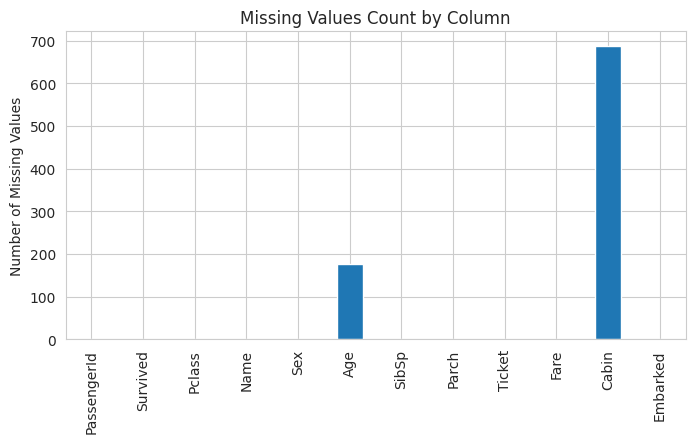

In [ ]:
# Count missing values per column
missing_data = df.isnull().sum()

# Plot bar chart of missing values
missing_data.plot(kind='bar', figsize=(8, 4))
plt.title("Missing Values Count by Column")
plt.ylabel("Number of Missing Values")
plt.show()


## Observations Null values

### Data Overview

| Feature      | Missing Values |
|--------------|----------------|
| PassengerId  | 0              |
| Survived     | 0              |
| Pclass       | 0              |
| Name         | 0              |
| Sex          | 0              |
| Age          | 177            |
| SibSp        | 0              |
| Parch        | 0              |
| Ticket       | 0              |
| Fare         | 0              |
| Cabin        | 687            |
| Embarked     | 2              |

### Observations

1. **Age column**: 177 missing values. A large portion of passengers do not have age data, requiring imputation or removal.
2. **Cabin column**: 687 missing values, the majority of cabin data is missing. It may need to be dropped or treated carefully.
3. **Embarked column**: 2 missing values. These can be imputed easily using the mode of the column.
4. **Survived column**: No missing values, so survival analysis can proceed without missing data.
5. **Other columns (PassengerId, Pclass, Sex, SibSp, Parch, Ticket, Fare)**: No missing values and ready for analysis.


## Taking care of the missing data

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
     &nbsp; Missing data is a common problem that faces the data collected through a survey. This problem occurs when a dataset has no value for a feature in an observation.

There are many reasons why data might be missing in a dataset. For instance, data collected through a survey may have missing data due to participants’ failure to respond to some questions, not knowing the correct response, or being unwilling to answer. It may also be missing due to the error made during the data entry process.

Most machine learning models require data with a value for all features in each observation. In such models, missing data may lead to bias in the estimation of the parameters and also compromise the accuracy of the machine learning models.

As a result, we may end up drawing wrong conclusions about data. Therefore, missing data is harmful to machine learning models and requires appropriate handling.
</div>

## 1. Age (177 missing values)

### What to do:

* Imputation: Since age is an important variable, we should fill in the missing values.
    * One common approach is to fill missing values with the median age. This is better than using the mean because it reduces the influence of extreme values (outliers).
    * Alternatively, you could group passengers by similar characteristics (like Pclass and Sex) and fill the missing age values with the median within each group for better accuracy.

### Why:

Age is often important in survival analysis (younger or older passengers might have different survival chances), so it's necessary to keep this data as complete as possible.

In [ ]:
print("Missing values in Age column before imputation:", df['Age'].isnull().sum())

# Fill missing 'Age' values with the median of the 'Age' column
df['Age'].fillna(df['Age'].median(), inplace=True)

#  Check if the missing values have been filled
print("Missing values in Age column after imputation:", df['Age'].isnull().sum())

Missing values in Age column before imputation: 177
Missing values in Age column after imputation: 0


<ipython-input-97-e2522bff4fff>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


## 2. Cabin (687 missing values)

### What to do:

* Drop the column: Since a large portion of the cabin data is missing, and it might not be crucial for analysis, you could drop the column entirely.
* Simplify the data: If you want to keep some information, you can create a new feature like HasCabin (1 if the passenger has cabin information, 0 if not), which captures whether cabin info was available.

### Why:
With so many missing values (687 out of total rows), trying to fill in this data would likely introduce noise or unreliable information into your analysis.

In [ ]:
# Step 1: Check how many missing values are in the 'Cabin' column
print("Missing values in Cabin column before dropping:", df['Cabin'].isnull().sum())

# Step 2: Drop the 'Cabin' column from the DataFrame
df.drop(columns=['Cabin'], inplace=True)

# Step 3: Verify that the 'Cabin' column is removed
print("Cabin column exists after dropping:", 'Cabin' in df.columns)

Missing values in Cabin column before dropping: 687
Cabin column exists after dropping: False


### 3. Embarked (2 missing values)

### What to do:

* Impute with mode: Since there are only 2 missing values and "Embarked" is a categorical feature (port of embarkation), you can fill these with the most frequent value (the mode).


### Why:

The impact of these missing values is minimal because there are only two, and filling them with the mode will preserve the integrity of the data without skewing the results.

In [ ]:
# Step 1: Check the number of missing values in the 'Embarked' column
print("Missing values in Embarked column before imputation:", df['Embarked'].isnull().sum())

# Step 2: Fill missing 'Embarked' values with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Step 3: Check if the missing values have been filled
print("Missing values in Embarked column after imputation:", df['Embarked'].isnull().sum())

# Step 4: Verify the most frequent value in the 'Embarked' column (optional)
print("Most frequent value in Embarked column:", df['Embarked'].mode()[0])


Missing values in Embarked column before imputation: 2
Missing values in Embarked column after imputation: 0
Most frequent value in Embarked column: S


<ipython-input-99-b02607cac02e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
df.drop(columns=['PassengerId','Name', 'Ticket'], inplace=True)


* PassengerId: This column is unique for each passenger and doesn't provide useful information for predicting survival. It won’t help the model learn patterns since it's just an identifier.

* Name: Although it contains some potentially useful information (like titles indicating social status), it’s complex and varied, making it challenging to extract meaningful features. It’s often better to derive a simpler feature from it if needed.

* Ticket: Similar to PassengerId, this column is not useful for prediction. Ticket numbers are unique and do not indicate any information relevant to survival.


In [ ]:
print('Before Null Value Handle')
print('\n'*2)
print(data.isnull() .sum())
print('*'*80)
print('After Null Value Handle')
print('\n'*2)
print(df.isnull() .sum())
print('\n'*2)
print('*'*80)


Before Null Value Handle



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
********************************************************************************
After Null Value Handle



Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64



********************************************************************************


### No Null Value

## checking the duplicate rows

In [ ]:
# The sum() function will return the total count of duplicate rows.
df.duplicated().sum()

116

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df_train =df


<a id="EDA"></a>

# <div style="background-color: #D9C4EC; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  5. EDA </b></div>


In [ ]:
# 1. Separate categorical and numerical columns
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Sex', 'Embarked'], dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

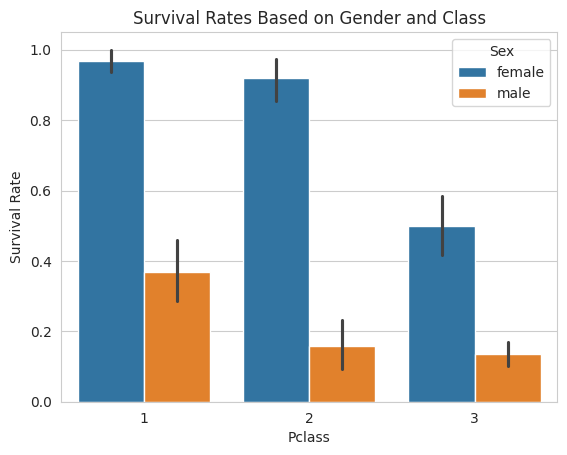

In [ ]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")
#help(sns.barplot)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

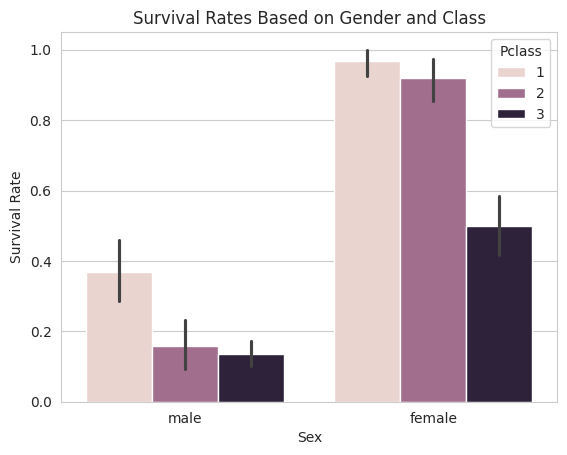

In [ ]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

## Age

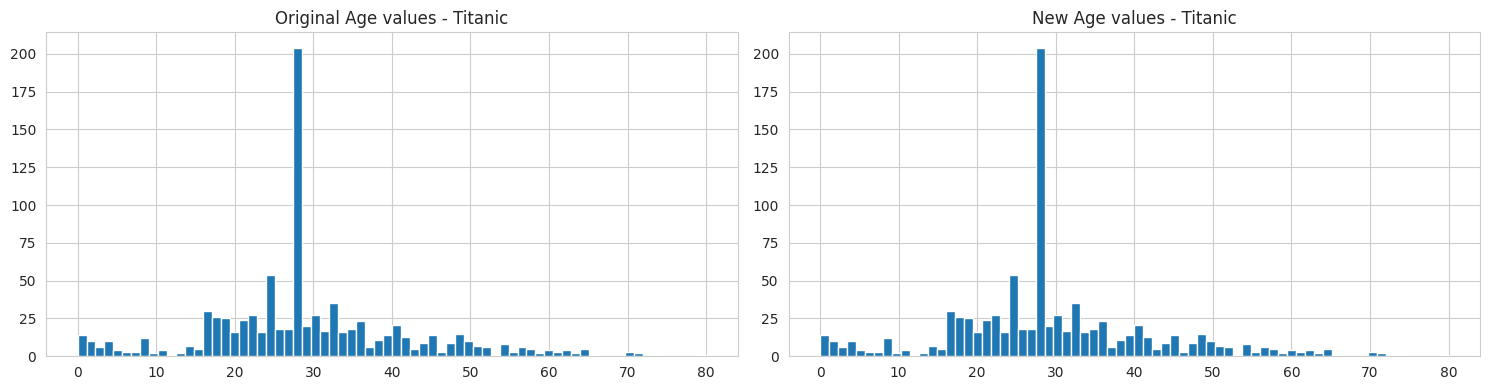

In [ ]:
# Set up subplots for visualization
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# Calculate average, standard deviation, and number of NaN values in the training set
average_age_titanic = df["Age"].mean()
std_age_titanic = df["Age"].std()
count_nan_age_titanic = df["Age"].isnull().sum()


# Generate random ages within one standard deviation from the mean for NaN values
rand_train_ages = np.random.randint(average_age_titanic - std_age_titanic,
                                    average_age_titanic + std_age_titanic,
                                    size=count_nan_age_titanic)


# Plot original Age values, dropping NaNs and converting to integer
df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# Fill NaN values in Age column with the generated random values
df.loc[df["Age"].isnull(), "Age"] = rand_train_ages


# Convert Age from float to int
df['Age'] = df_train['Age'].astype(int)


# Plot new Age values
df['Age'].hist(bins=70, ax=axis2)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
<ipython-input-110-f07e85ea1623>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Survived', data=average_age, ax=ax, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of

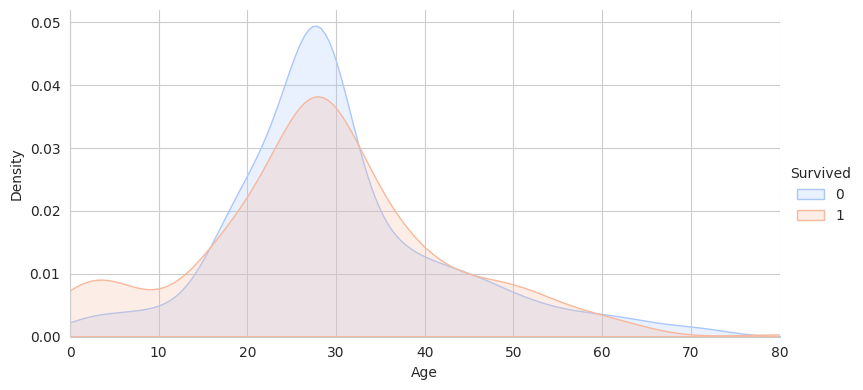

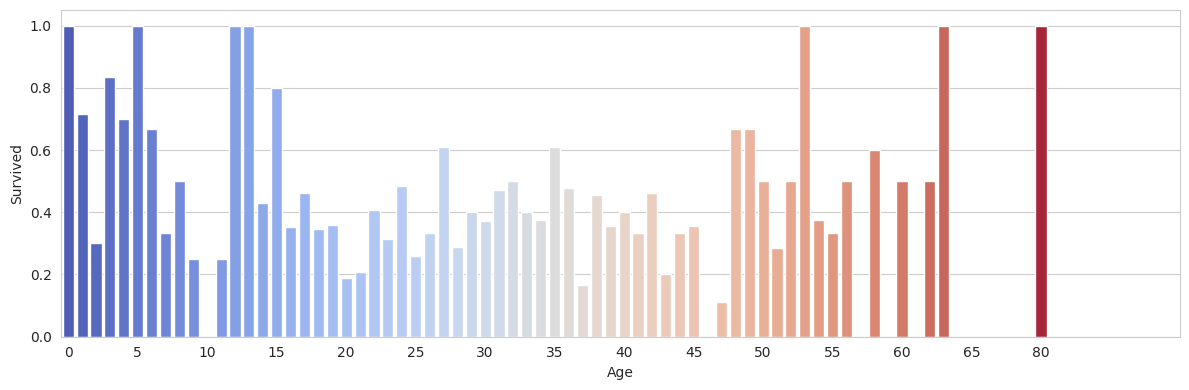

In [ ]:
# Set up a compact FacetGrid with KDE plot for 'Age' distribution by 'Survived' status
facet = sns.FacetGrid(df_train, hue="Survived", aspect=2, height=4, palette="coolwarm")
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

# Plot the average survival rate by age
fig, ax = plt.subplots(figsize=(12, 4))  # Compact figure size

# Group by 'Age' and calculate the mean survival rate
average_age = df_train.groupby('Age', as_index=False)['Survived'].mean()

# Use a color palette to add variation based on the survival rate
colors = sns.color_palette("coolwarm", len(average_age))

# Bar plot with different colors for each bar
sns.barplot(x='Age', y='Survived', data=average_age, ax=ax, palette=colors)

# Reduce the number of x-ticks for better readability
ax.set_xticks(range(0, int(df_train['Age'].max()) + 1, 5))

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-p

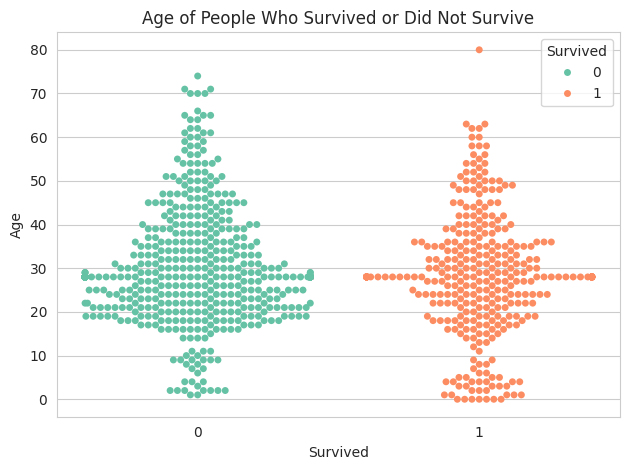

In [ ]:
# Title of the plot
plt.title("Age of People Who Survived or Did Not Survive")

# Create a colorful swarm plot with different hues for 'Survived'
sns.swarmplot(x='Survived', y='Age', data=df_train, palette="Set2", hue="Survived")

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-112-38e0b06e8812>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived_ages, kde=False)
<ipython-input-112-38e0b06e8812>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_survived_ages, kde=False)


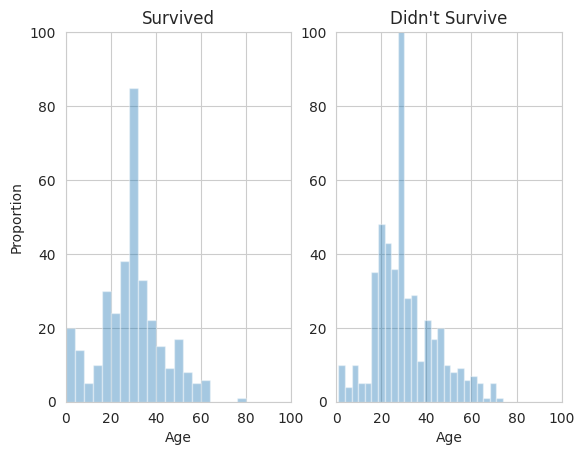

In [ ]:
survived_ages = df_train[df_train.Survived == 1]["Age"]
not_survived_ages = df_train[df_train.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

## Fare

<ipython-input-113-1973be890a27>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].median(), inplace=True)


<Axes: xlabel='Survived'>

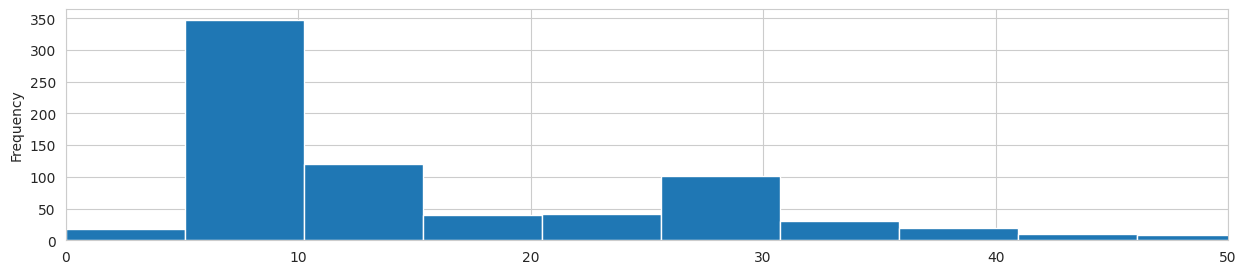

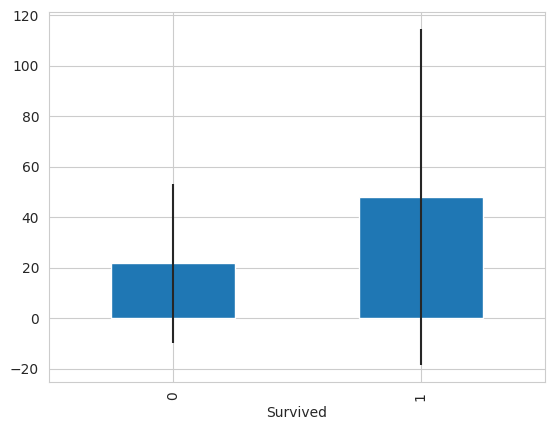

In [ ]:
df["Fare"].fillna(df["Fare"].median(), inplace=True)


# convert from float to int
df['Fare'] = df['Fare'].astype(int)

# get fare for survived & didn't survive passengers
fare_not_survived = df["Fare"][df["Survived"] == 0]
fare_survived     = df["Fare"][df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-

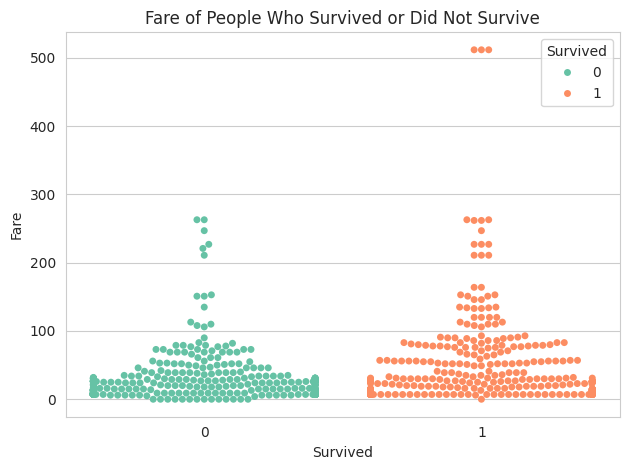

In [ ]:
# Title of the plot
plt.title("Fare of People Who Survived or Did Not Survive")

# Create a colorful swarm plot with different hues for 'Survived'
sns.swarmplot(x='Survived', y='Fare', data=df, palette="Set2", hue="Survived")

# Display the plot
plt.tight_layout()
plt.show()

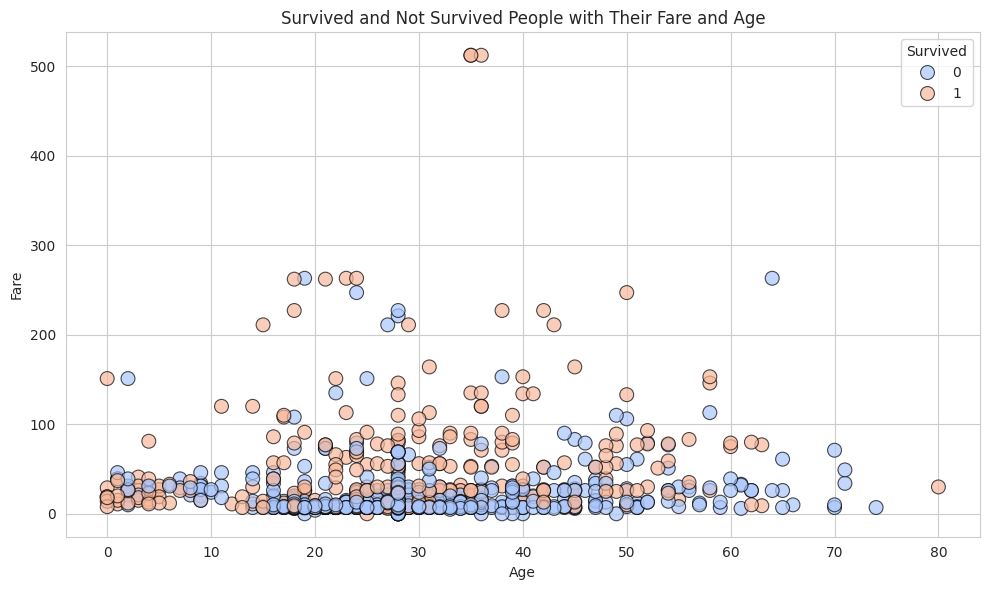

In [ ]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Title of the plot
plt.title("Survived and Not Survived People with Their Fare and Age")

# Create a colorful scatter plot with hue for survival, larger points, and a different palette
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train,
                palette="coolwarm", s=100, edgecolor="black", alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

## common

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 2000x2000 with 0 Axes>

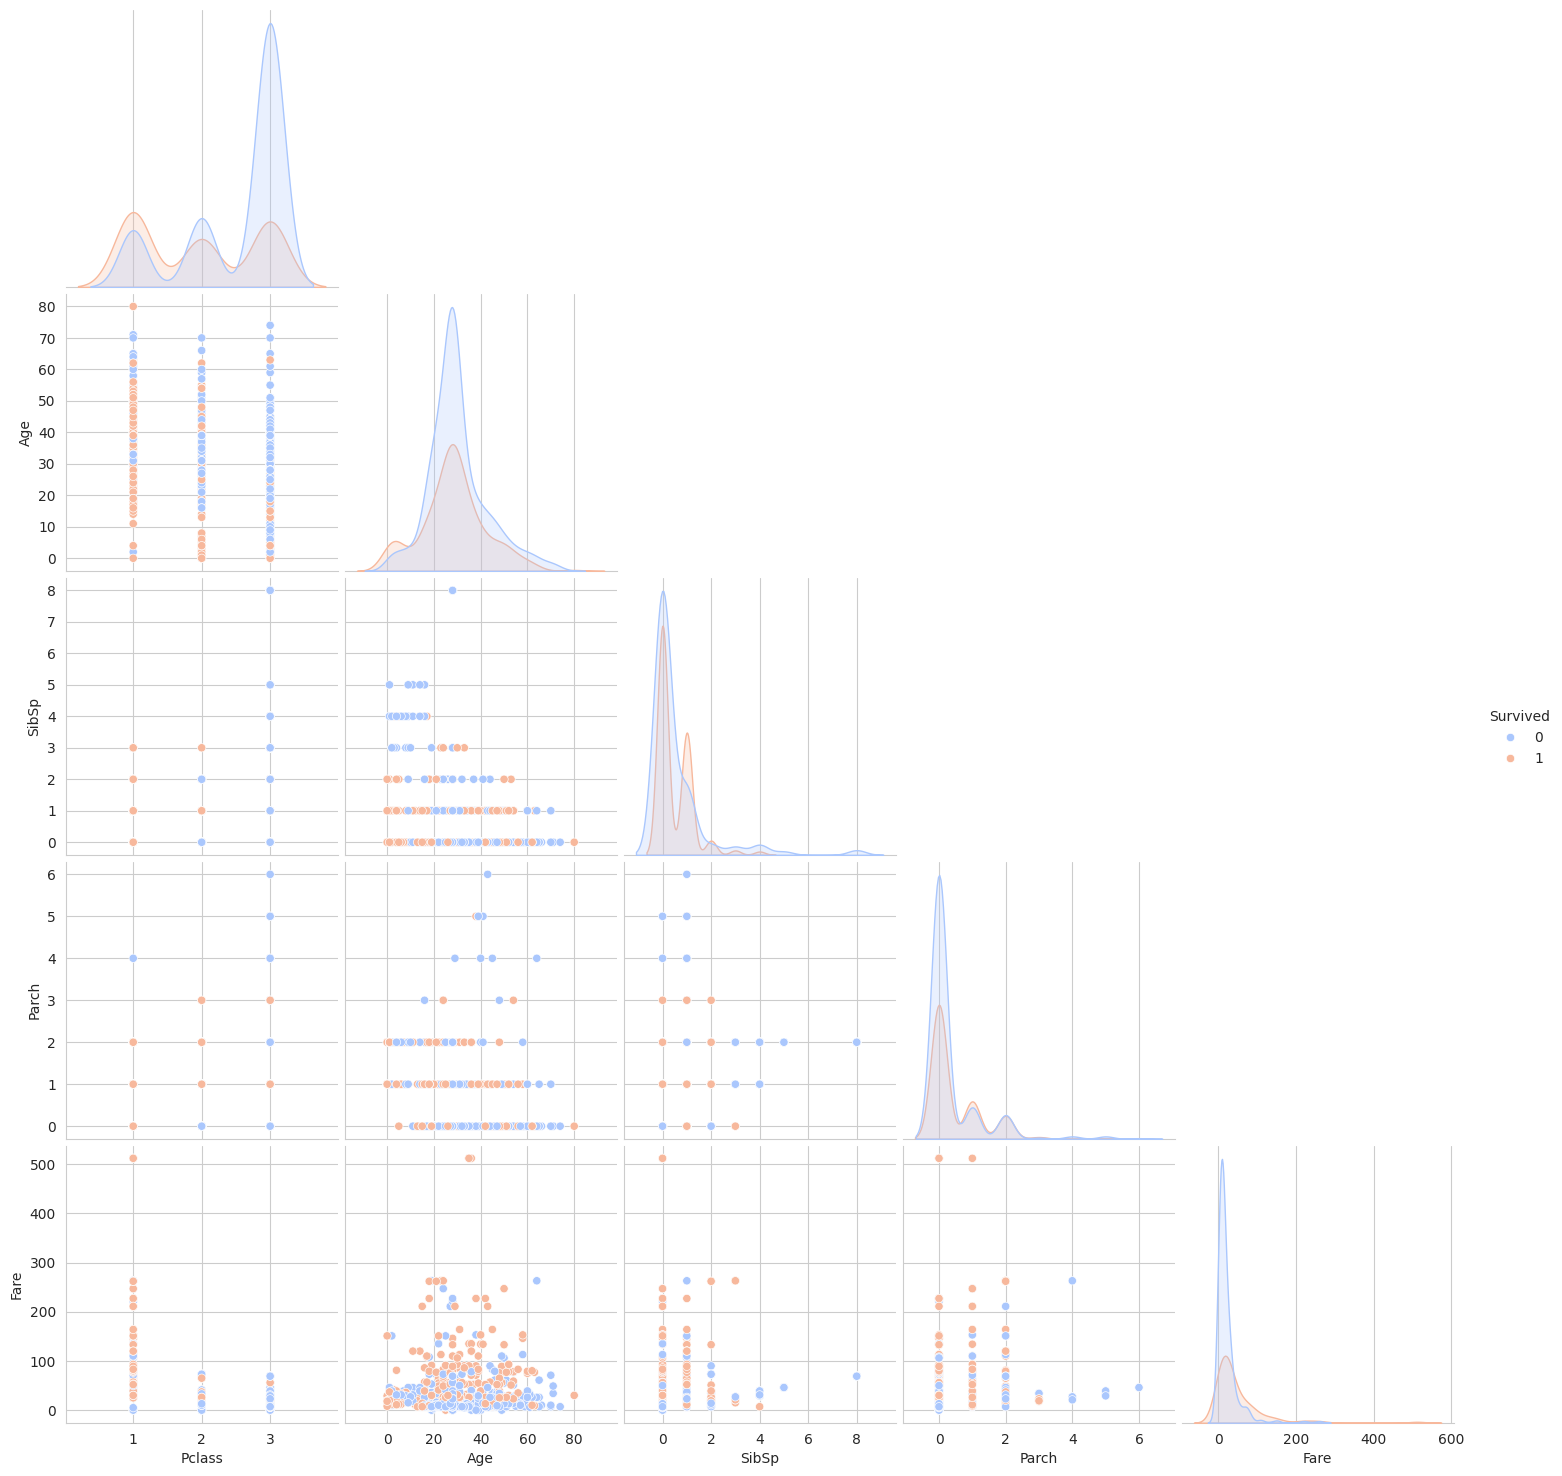

In [ ]:
# Set a larger plot size
plt.figure(figsize=(20, 20))

# Create a colorful pairplot with a larger size, hue for 'Survived', and distinct color palette
sns.pairplot(df, hue="Survived", palette="coolwarm", corner=True, height=3)

# Display the plot
plt.show()

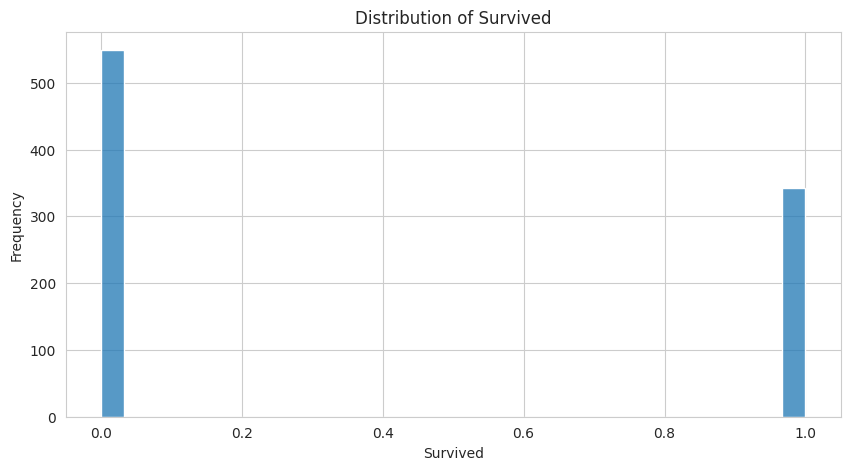

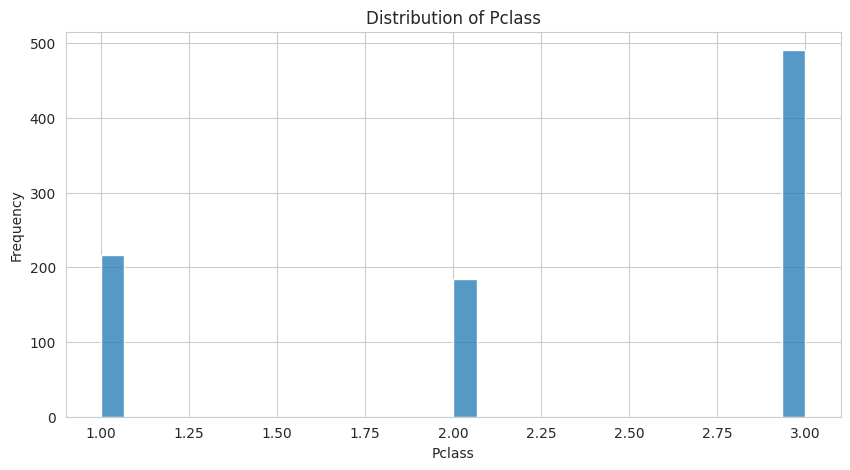

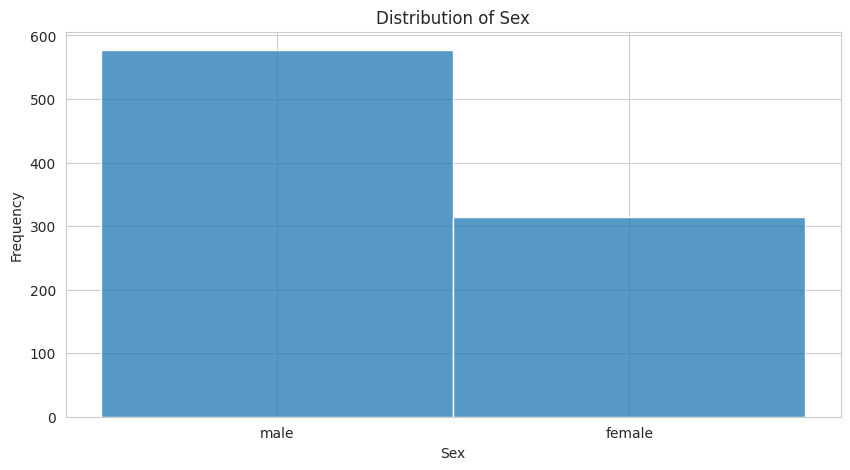

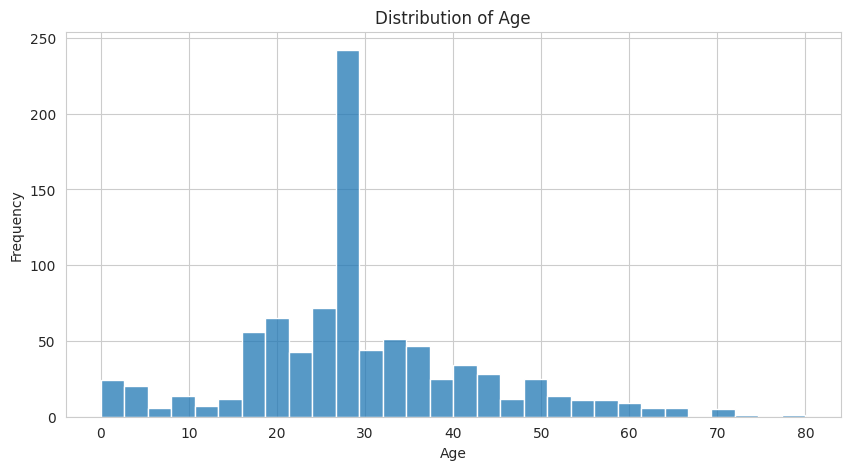

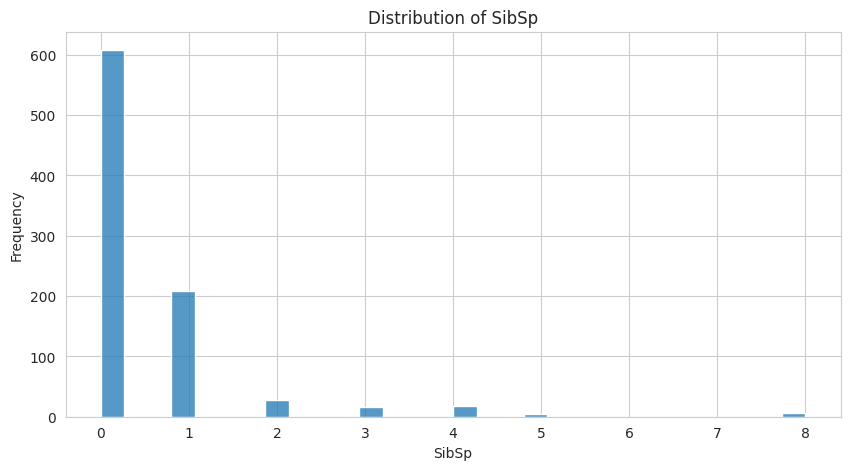

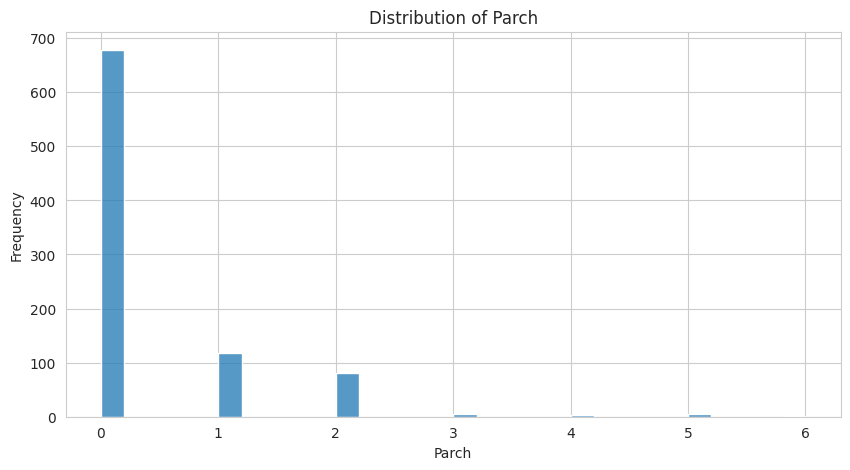

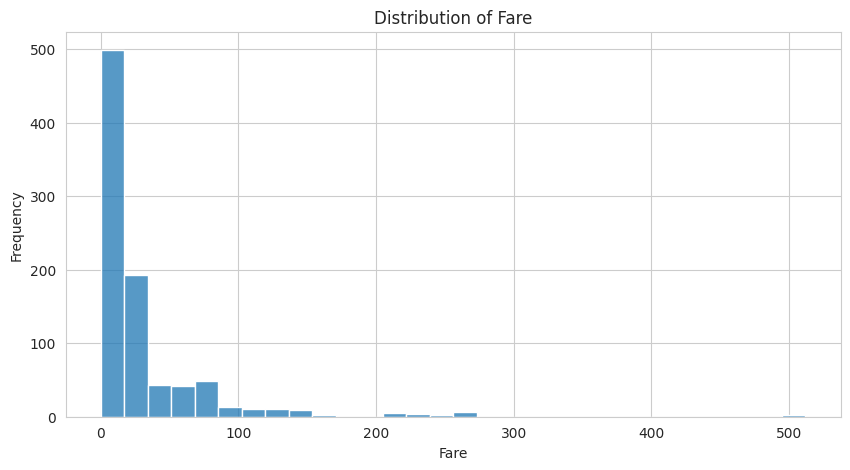

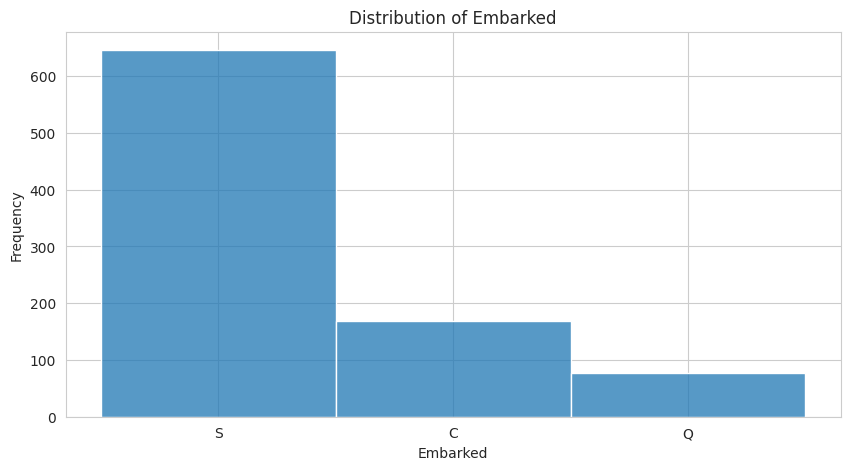

In [ ]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df_categorical_cols = df.select_dtypes(include=['object', 'category'])

continuous_vars = df.select_dtypes(include=['int64', 'float64'])


In [ ]:
df_categorical_cols

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [ ]:
continuous_vars.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

 ### Regression Line for Continuous Variables

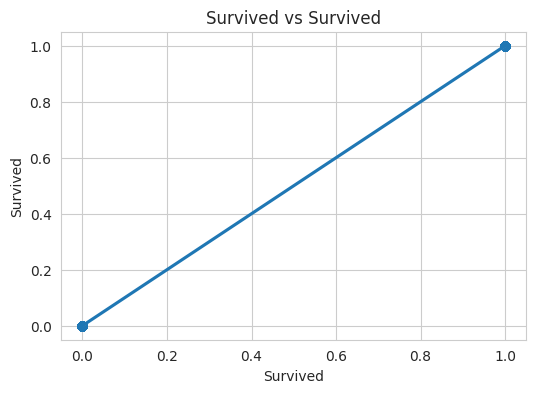

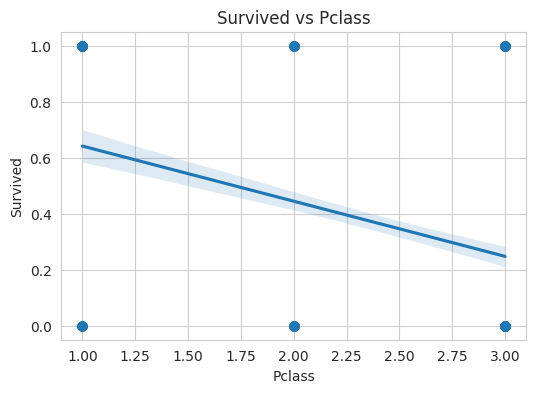

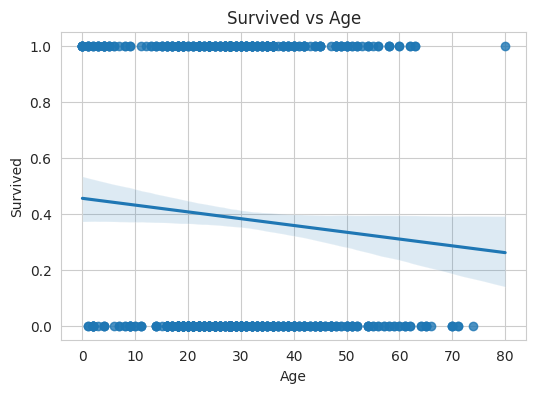

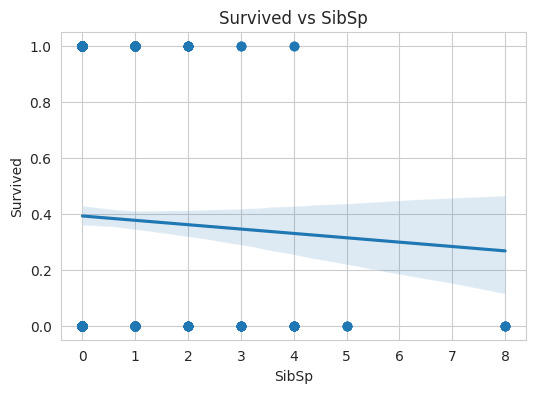

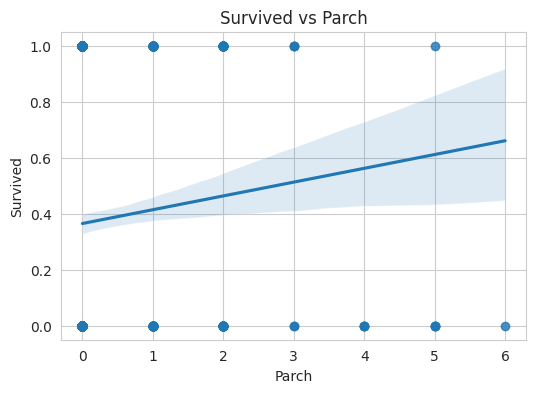

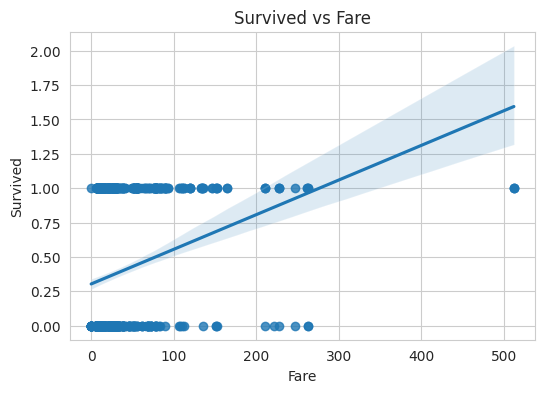

In [ ]:
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=var, y='Survived', data=df)
    plt.title(f'Survived vs {var}')
    plt.show()

 ### Box Plots for Categorical Variables

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


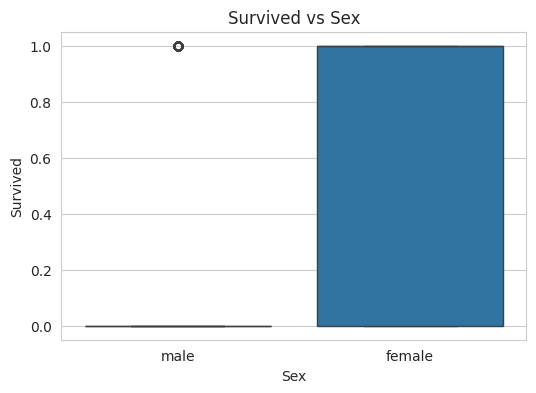

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


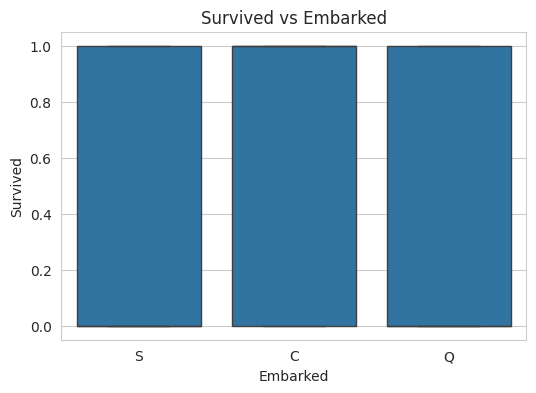

In [ ]:
for var in df_categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=var, y='Survived', data=df_train)
    plt.title(f'Survived vs {var}')
    plt.show()

 ### Box Plots for Categorical Variables

<ipython-input-123-525df9b68d65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Survived', data=df, palette="Set2")  # Colorful palette
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

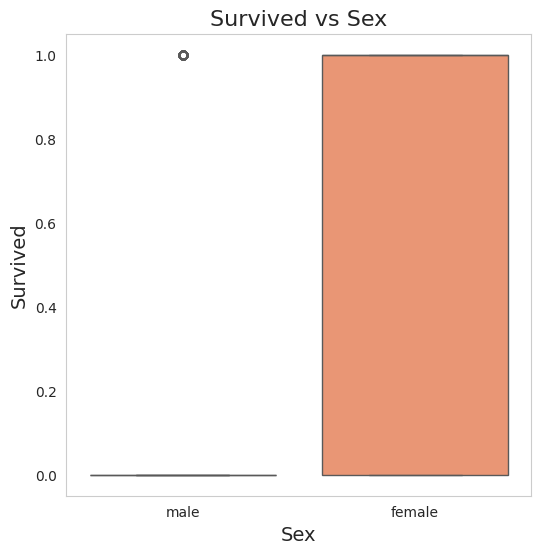

<ipython-input-123-525df9b68d65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Survived', data=df, palette="Set2")  # Colorful palette
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

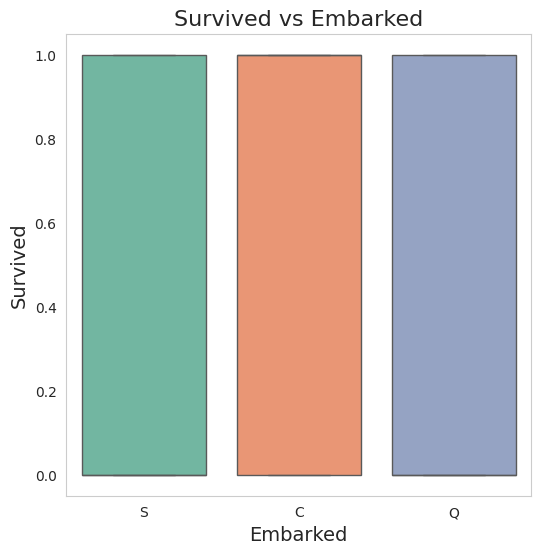

In [ ]:
# Loop through each categorical column to create colorful boxplots
for var in df_categorical_cols:
    plt.figure(figsize=(6, 6))  # Increased figure size for better visibility
    sns.boxplot(x=var, y='Survived', data=df, palette="Set2")  # Colorful palette
    plt.title(f'Survived vs {var}', fontsize=16)  # Larger title font for emphasis
    plt.xlabel(var, fontsize=14)  # Larger x-label font
    plt.ylabel('Survived', fontsize=14)  # Larger y-label font
    plt.grid(axis='y')  # Optional: add grid lines for better readability
    plt.show()

<a id="Encoding"></a>

# <div style="background-color: #D9C4EC; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  6. Label Encoding </b></div>



In [ ]:
df_train=df
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7,S
1,1,1,female,38,1,0,71,C
2,1,3,female,26,0,0,7,S
3,1,1,female,35,1,0,53,S
4,0,3,male,35,0,0,8,S


## 1. Sex Encoding is Label Encoding:
Since the Sex column has two categories (male and female), Label Encoding is a simple and efficient method.

* How: Use Label Encoding, which converts "male" and "female" into 0 and 1.
    * Male = 0
    * Female = 1
* Why: With only two categories, label encoding is straightforward and effective. This allows the model to interpret the data numerically without adding unnecessary complexity.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])


## 2. Embarked Encoding:
The Embarked column has three categories (S = Southampton, C = Cherbourg, Q = Queenstown). For this, One-Hot Encoding is a good choice.

* How: One-Hot Encoding creates separate binary columns for each category ("S", "C", "Q").
    * Embarked_S: 1 if the passenger embarked at Southampton, 0 otherwise
    * Embarked_C: 1 if the passenger embarked at Cherbourg, 0 otherwise
    * Embarked_Q: 1 if the passenger embarked at Queenstown, 0 otherwise
* Why: One-Hot Encoding is better here because it prevents the model from assuming any ordinal relationship between the categories (e.g., S > C > Q).

In [ ]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)


In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7,False,True
1,1,1,0,38,1,0,71,False,False
2,1,3,0,26,0,0,7,False,True
3,1,1,0,35,1,0,53,False,True
4,0,3,1,35,0,0,8,False,True


<a id="Engineering"></a>

# <div style="background-color: #D9C4EC; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  7. Feature Engineering </b></div>



In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7,False,True
1,1,1,0,38,1,0,71,False,False
2,1,3,0,26,0,0,7,False,True
3,1,1,0,35,1,0,53,False,True
4,0,3,1,35,0,0,8,False,True


In [ ]:
df_train.corr()["Survived"]


,Survived
Survived,1.000000
Pclass,-0.338481
Sex,-0.543351
Age,-0.064909
SibSp,-0.035322
Parch,0.081629
Fare,0.257482
Embarked_Q,0.003650
Embarked_S,-0.149683


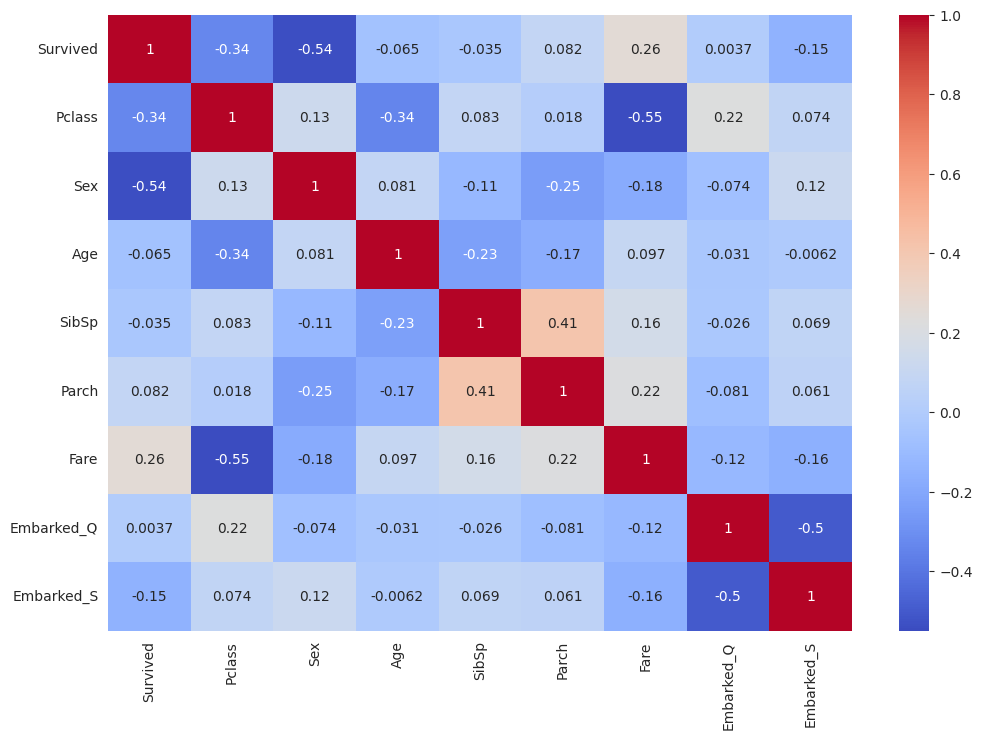

In [ ]:
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Correlation: **Survived** vs Other Features

#### 1. **Survived vs Pclass (-0.34)**
- **Moderate negative correlation** between survival and passenger class.
- Passengers in **lower classes** (3rd class) were **less likely to survive**, while those in **higher classes** (1st class) were **more likely to survive**.

#### 2. **Survived vs Sex (-0.54)**
- **Strong negative correlation** between survival and gender.
- This suggests that **females** had a much higher survival rate than males. Males (coded 0) were less likely to survive compared to females (coded 1).

#### 3. **Survived vs Age (-0.065)**
- **Very weak negative correlation**.
- There is almost **no relationship** between age and survival, meaning age alone did not significantly affect survival chances.

#### 4. **Survived vs SibSp (-0.035)**
- **Very weak negative correlation** between survival and the number of siblings or spouses aboard.
- This implies that having siblings or a spouse on board **did not significantly affect survival chances**.

#### 5. **Survived vs Parch (0.082)**
- **Very weak positive correlation**.
- Having parents or children aboard had a **slight positive effect** on survival, but the impact is minimal.

#### 6. **Survived vs Fare (0.26)**
- **Moderate positive correlation**.
- Passengers who paid **higher fares were more likely to survive**. This indicates wealthier passengers had a better chance of survival.

#### 7. **Survived vs Embarked_Q (0.0037)**
- **Very weak positive correlation**.
- Embarking from Queenstown (Q) had **no significant effect on survival chances**.

#### 8. **Survived vs Embarked_S (-0.15)**
- **Slight negative correlation**.
- Passengers embarking from Southampton (S) were **slightly less likely to survive**, though the impact is not strong.

---

### Summary of Key Correlations:
- **Sex** and **Pclass** have the strongest correlation with survival:
  - **Females** were more likely to survive.
  - **Higher-class passengers** (1st class) were more likely to survive.
- **Fare** and **Parch**   has a moderate positive correlation, indicating **richer passengers** had better chances of survival.
- Variables like **Age**, **SibSp** had very weak correlations, suggesting they were **not major predictors of survival**.


### Dropping the **Age** and **SibSp** Columns

#### Reason for Dropping:
1. **Age (-0.065 correlation with Survived)**
   - The **correlation between Age and Survived is very weak** and close to zero.
   - This indicates that age **does not have a significant impact** on whether a passenger survived or not.
   - Keeping the **Age** column might introduce unnecessary noise into the model and **won’t add predictive power**.

2. **SibSp (-0.035 correlation with Survived)**
   - Similar to Age, the **correlation between SibSp (siblings/spouses aboard) and Survived is extremely weak**.
   - Since the relationship between this feature and survival is negligible, it is **not a valuable predictor** for survival outcomes.
   - Dropping this column will help **simplify the dataset** without losing important information.

#### Conclusion:
- Both **Age** and **SibSp** show very weak correlations with survival, indicating they are **not significant contributors** to the prediction of survival in this dataset.
- By dropping these columns, we can **reduce dimensionality** and **focus on features** that have a stronger influence on survival, which should improve model performance.


In [ ]:
#### Code Implementation:
## The following code will be executed to drop these features from the DataFrame:

# Drop less important features from the DataFrame
columns_to_drop = [ 'SibSp', 'Age']
df_train.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
print(df_train.head())

   Survived  Pclass  Sex  Parch  Fare  Embarked_Q  Embarked_S
0         0       3    1      0     7       False        True
1         1       1    0      0    71       False       False
2         1       3    0      0     7       False        True
3         1       1    0      0    53       False        True
4         0       3    1      0     8       False        True


Let's generate a dataframe to submit our model's predictions for the competition.






